In [1]:
#Import libraries

import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as st

In [3]:
#Read data set

df=pd.read_csv('hotel_bookings.csv')
df.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


INSIGHT - DATA SET IS HUGE.  ALMOST 120,000 ROWS (EACH A SEPARATE RESERVATION) WITH 32 VARIABLES (ROWS) OF INFORMATION COLLECTED ABOUT EACH RESERVATION.  WITH THIS MUCH DATA IT MAY BE CHALLENGING TO PINPOINT WHAT CONDITIONS/WHO IS MOST LIKELY TO CANCEL THEIR RESERVATION

20 ROWS ARE NUMERIC (FLOAT OR INTEGER) AND 12 ARE TEXT (STRINGS)

Summary of the Numeric Variables (floats & integers, 20 columns)

1.  Bookings cancelled - boolean - 37% cancellation rate
2.  Lead time - booked 104 days ahead on avg, median of 69 days, ranging from 0 days (same day) to 737 days ahead
3.  Arrival yr/week/mth - 2015-17, further analysis below
4.  Wknd night stays - 0.93 nights on avg, median 1 night, ranging from 0 nights (for weekday guests?) to 19 nights (is this an outlier and/or in error?)
5.  Week night stays - 2.5 nights on avg, median 2 nights, ranging from 0 nights (weekend guests?) to 50 nights
6.  Adults - 1.9 on avg, median 2 adults, ranging 0 adults (is this possible?) to 55 adults (is this feasible?)
7.  Children - seldom - 0.1 (none) on avg, median none, ranging none to 10 childres (is this possible?)
8.  Babies - even more seldom - 0.01 (none) on avg
9.  Repeat guest - boolean - 3% on avg
10. # of Previous cancellations - almost none on avg (0.03), median of none, range of none to 26
11. # of Previous bookings not canceled - 0.13 on avg, median of none, range of none to 72
12. Booking changes - 0.22 on avg, median of none, range of none to 21
13. Agent - an ID# assigned to each agent - so only worth measuring whether agent vs. non-agent?
14. Company - an ID# assigned to booking company - so just applicable to contract or group customers?
15. Days on wait list - 2.3 days on avg, range of 0 to 391 days (is that realistic?)
16. ADR ($/night) - avg. of $102/night, median $95, range of $0 to $391
17. Parking spaces - 0.06 spaces on avg, 0 median, range of 0 to 8 spaces
18. # of Special requests - 0.6 on avg, 0 median, range of 0 to 5 requests 


In [4]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
hotel,119390,2,City Hotel,79330,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_canceled,119390,NaN,NaN,NaN,0.370416,0.482918,0,0,0,1,1
lead_time,119390,NaN,NaN,NaN,104.011,106.863,0,18,69,160,737
arrival_date_year,119390,NaN,NaN,NaN,2016.16,0.707476,2015,2016,2016,2017,2017
arrival_date_month,119390,12,August,13877,NaN,NaN,NaN,NaN,NaN,NaN,NaN
arrival_date_week_number,119390,NaN,NaN,NaN,27.1652,13.6051,1,16,28,38,53
arrival_date_day_of_month,119390,NaN,NaN,NaN,15.7982,8.78083,1,8,16,23,31
stays_in_weekend_nights,119390,NaN,NaN,NaN,0.927599,0.998613,0,0,1,2,19
stays_in_week_nights,119390,NaN,NaN,NaN,2.5003,1.90829,0,1,2,3,50
adults,119390,NaN,NaN,NaN,1.8564,0.579261,0,2,2,2,55


Summary of the Non-Numeric (String) Variables

(0, 1000)

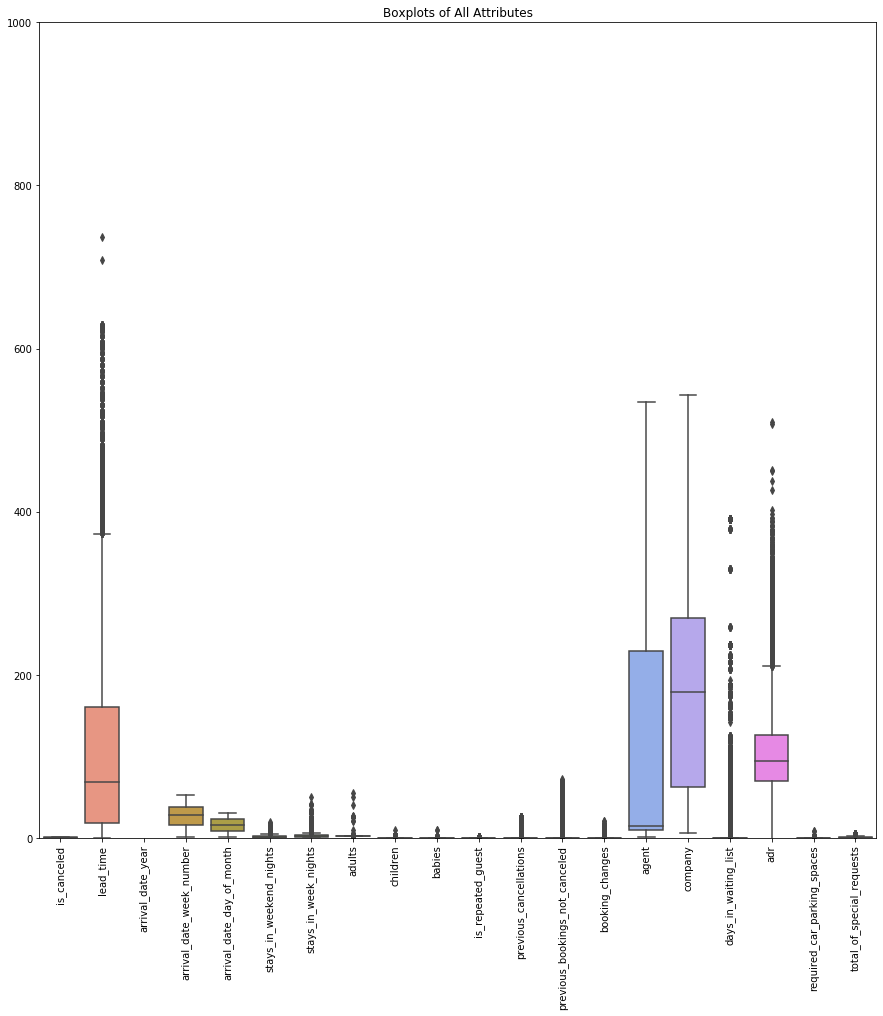

In [5]:
#Boxplots of all Attributes

plt.figure(figsize=(15,15))

sns.boxplot(data=df)
plt.title('Boxplots of All Attributes')
plt.xticks(rotation=90)
plt.ylim(0,1000)

INSIGHT - SOME EXTREME VALUES AND OUTLIERS APPEAR TO BE SKEWING TRENDS AND THE WIDE SCALE OF EACH MAKE VISUALIZATION OF ALL VARIABLES TOGETHER DIFFICULT. TO REFINE, I WILL REMOVE OUTLIERS, VIEW CANCELED VS. NON CANCELED SIDE BY SIDE, AND REPEAT ON A SMALLER SCALE (YLIM) TO VIEW REMAINING VARIABLES.

In [5]:
#Remove outliers for further analysis (boxplots, other stats)

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
#filter for the outliers

df_o = df.loc[~((df > (Q3 + 1.5 * IQR))).any(axis=1)].copy()
df_o = df_o.drop(['children', 'babies', 'is_repeated_guest','previous_cancellations', 'previous_bookings_not_canceled','booking_changes', 'days_in_waiting_list','required_car_parking_spaces'], axis=1)

In [6]:
df_o.to_csv(r'C:\Users\Justin\Desktop\Hotel Reservation Data Analysis\export_df_o.csv', index = False, header=True)

In [7]:
df_o.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
hotel,67930,2,City Hotel,48091,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_canceled,67930,NaN,NaN,NaN,0.387134,0.487098,0,0,0,1,1
lead_time,67930,NaN,NaN,NaN,89.5173,86.2233,0,18,63,139,373
arrival_date_year,67930,NaN,NaN,NaN,2016.19,0.697763,2015,2016,2016,2017,2017
arrival_date_month,67930,12,May,7494,NaN,NaN,NaN,NaN,NaN,NaN,NaN
arrival_date_week_number,67930,NaN,NaN,NaN,26.512,13.7128,1,15,26,38,53
arrival_date_day_of_month,67930,NaN,NaN,NaN,15.675,8.78813,1,8,16,23,31
stays_in_weekend_nights,67930,NaN,NaN,NaN,0.868997,0.869761,0,0,1,2,4
stays_in_week_nights,67930,NaN,NaN,NaN,2.29703,1.41473,0,1,2,3,6
adults,67930,NaN,NaN,NaN,1.81098,0.392802,0,2,2,2,2


In [ ]:
INSIGHT - ALMOST HALF OF ALL RESERVATIONS ARE OUTLIERS

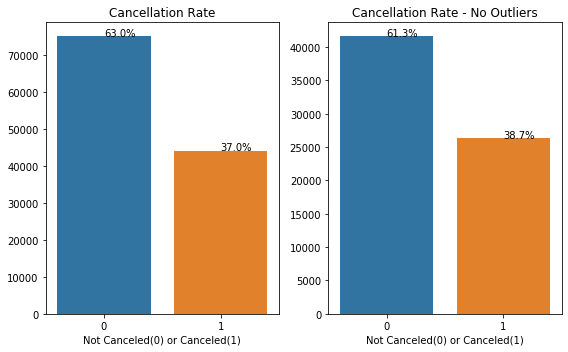

In [8]:
#Cancelled (1) vs Non-Cancelled (0)
    
plt.figure(figsize=(8,5))

plt.subplot(1,2,1)
ax = sns.countplot(x='is_canceled', data=df)
plt.title("Cancellation Rate")
plt.xlabel("Not Canceled(0) or Canceled(1)")
plt.ylabel("")

total = len(df['is_canceled'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() /2
        y = p.get_y() + p.get_height() +0.02
        ax.annotate(percentage, (x, y))

plt.subplot(1,2,2)
ax = sns.countplot(x='is_canceled', data=df_o)
plt.title("Cancellation Rate - No Outliers")
plt.xlabel("Not Canceled(0) or Canceled(1)")
plt.ylabel("")

total = len(df_o['is_canceled'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() /2
        y = p.get_y() + p.get_height() +0.02
        ax.annotate(percentage, (x, y))

plt.tight_layout()        
plt.show()

INSIGHT - A VERY SIGNIFICANT PORTION OF RESERVATIONS WERE CANCELED.  37% (OVER 40,000) WERE CANCELLED.  SIMILAR BUT SLIGHTLY HIGHER PROPORTION WITH NO OUTLIERS

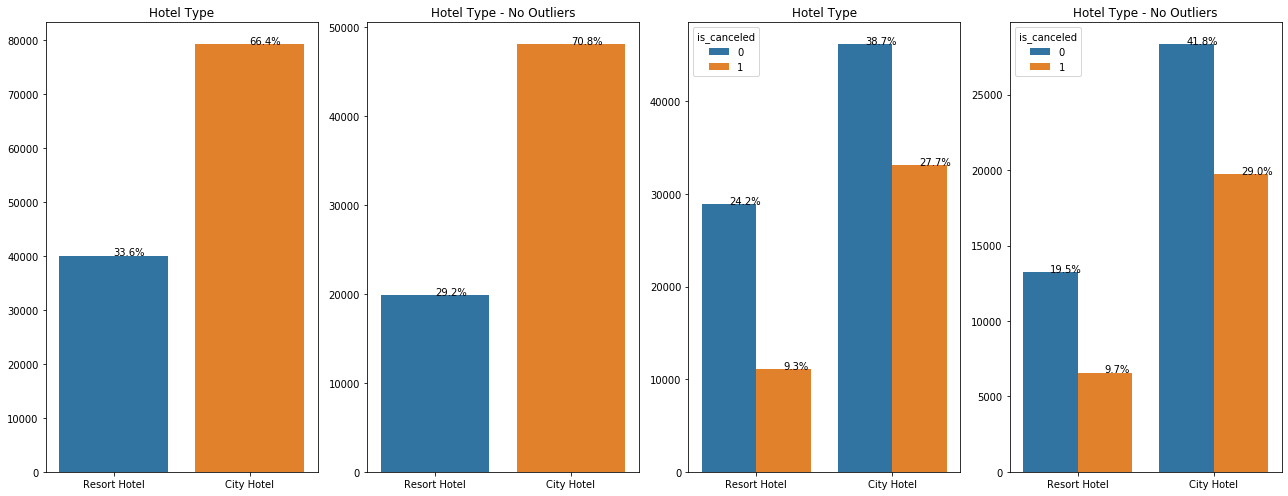

In [9]:
plt.figure(figsize=(18,7))


plt.subplot(1,4,1)
ax = sns.countplot(x='hotel', data=df)
plt.title("Hotel Type")
plt.xlabel("")
plt.ylabel("")

total = len(df['hotel'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() /2
        y = p.get_y() + p.get_height() +0.02
        ax.annotate(percentage, (x, y))

        
plt.subplot(1,4,2)
ax = sns.countplot(x='hotel', data=df_o)
plt.title("Hotel Type - No Outliers")
plt.xlabel("")
plt.ylabel("")

total = len(df_o['hotel'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() /2
        y = p.get_y() + p.get_height() +0.02
        ax.annotate(percentage, (x, y))

        
plt.subplot(1,4,3)
ax = sns.countplot(x='hotel', hue='is_canceled', data=df)
plt.title("Hotel Type")
plt.xlabel("")
plt.ylabel("")

total = len(df['hotel'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() /2
        y = p.get_y() + p.get_height() +0.02
        ax.annotate(percentage, (x, y))

        
plt.subplot(1,4,4)
ax = sns.countplot(x='hotel', hue='is_canceled', data=df_o)
plt.title("Hotel Type - No Outliers")
plt.xlabel("")
plt.ylabel("")

total = len(df_o['hotel'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() /2
        y = p.get_y() + p.get_height() +0.02
        ax.annotate(percentage, (x, y))        

        
        
plt.tight_layout()        
plt.show()

INSIGHT - RESERVATION INFO WAS COLLECTED FROM TWO HOTELS IN PORTUGAL.  ONE IF REFERRED TO AS CITY HOTEL (2/3 OF THE TOTAL), THE OTHER RESORT HOTEL (1/3).  HIGHER PROPORTION OF CITY HOTEL GUESTS W/O OUTLIERS.

RESORT - CANCELLED 28%/35% WITH/NO OUTLIERS
CITY - CANCELLED 41%/42% WITH/NO OUTLIERS

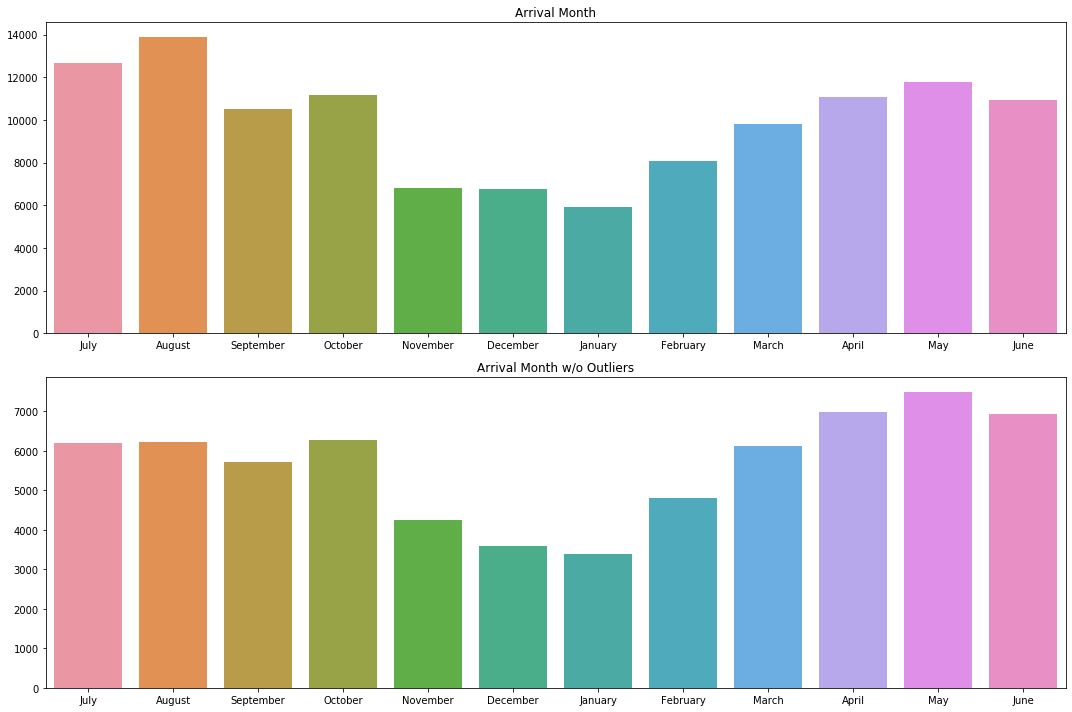

In [10]:
#Bar Graph of Reservations by Month

plt.figure(figsize=(15,10))

plt.subplot(2,1,1)
sns.countplot(df['arrival_date_month'])
plt.title("Arrival Month")
plt.xlabel("")
plt.ylabel("")

plt.subplot(2,1,2)
sns.countplot(df_o['arrival_date_month'])
plt.title("Arrival Month w/o Outliers")
plt.xlabel("")
plt.ylabel("")

plt.tight_layout()
plt.show()
#if you use this code, it sorts by count of month
#sns.countplot(x=df['arrival_date_month'],
#                   order=df['arrival_date_month'].value_counts().index)

INSIGHT - SEASONALITY IS APPARENT IN VIEWING THE RESERVATIONS BY MONTH.  SUMMER INTO FALL IS THE HIGH SEASON (JULY-OCT ARE 4 HIGHEST MONTHS), FOLLOWED BY FALL INTO WINTER AS THE LOW SEASON (NOV-JAN ARE 3 LOWEST MONTHS).  

ARRIVALS W/O OUTLIERS SKEW TOWARD APRIL/MAY AS HIGH SEASON BUT FOLLOWS SIMILAR SEASONALITY PATTERN.

ENTIRE TIME PERIOD SPANS JULY 2015 TO AUGUST 2017.

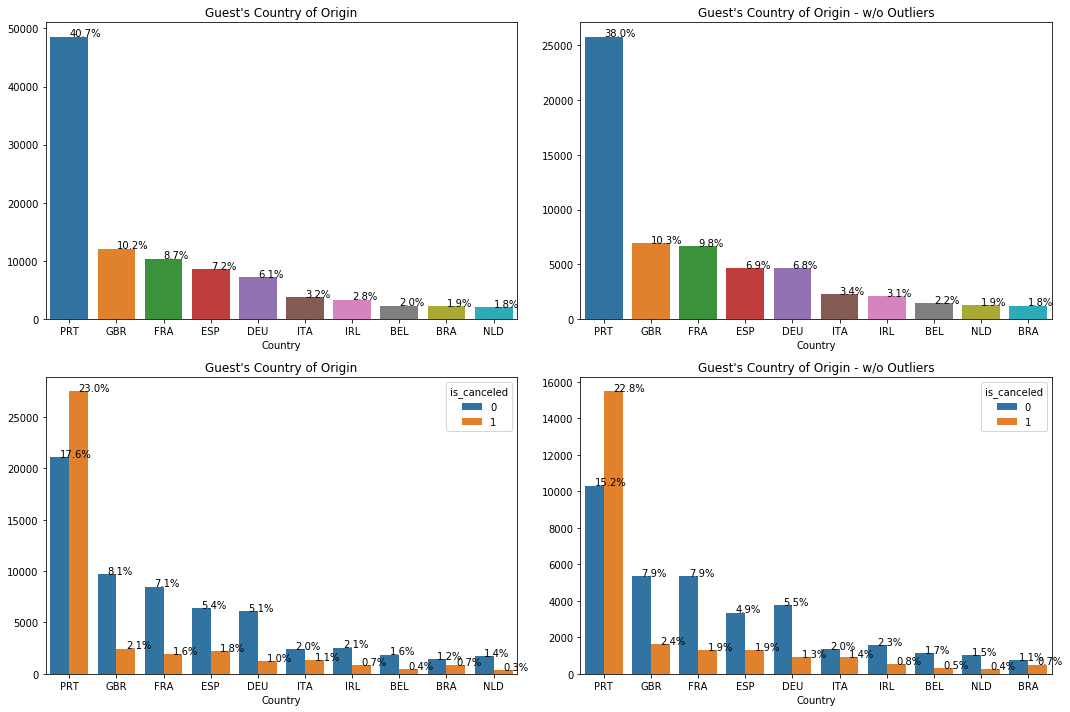

In [11]:
#Guest country of origin

plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
ax = sns.countplot(x='country', data=df, order = df.country.value_counts().iloc[:10].index)
plt.title("Guest's Country of Origin")
plt.xlabel("Country")
plt.ylabel("")

total = len(df['country'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() /2
        y = p.get_y() + p.get_height() +0.02
        ax.annotate(percentage, (x, y))

plt.subplot(2,2,2)
ax = sns.countplot(x='country', data=df_o, order = df_o.country.value_counts().iloc[:10].index)
plt.title("Guest's Country of Origin - w/o Outliers")
plt.xlabel("Country")
plt.ylabel("")

total = len(df_o['country'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() /2
        y = p.get_y() + p.get_height() +0.02
        ax.annotate(percentage, (x, y))        

plt.subplot(2,2,3)
ax = sns.countplot(x='country', hue='is_canceled', data=df, order = df.country.value_counts().iloc[:10].index)
plt.title("Guest's Country of Origin")
plt.xlabel("Country")
plt.ylabel("")

total = len(df['country'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() /2
        y = p.get_y() + p.get_height() +0.02
        ax.annotate(percentage, (x, y))

plt.subplot(2,2,4)
ax = sns.countplot(x='country', hue='is_canceled',data=df_o, order = df_o.country.value_counts().iloc[:10].index)
plt.title("Guest's Country of Origin - w/o Outliers")
plt.xlabel("Country")
plt.ylabel("")

total = len(df_o['country'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() /2
        y = p.get_y() + p.get_height() +0.02
        ax.annotate(percentage, (x, y))                
        
        
plt.tight_layout()
plt.show()

INSIGHT - OVER 40% OF ALL GUESTS ARE LOCAL TO PORTUGAL.  W/O OUTLIERS IT IS LESS, 35%.  STILL ALL OF THE TOP TEN COUNTRIES ARE THE SAME.

WHILE A TOTAL OF 177 NATIONALITIES ARE REPRSENTED IN THE RESERVATIONS, A VERY SMALL PERCENTAGE COME FROM OUTSIDE OF EUROPE.

PORTUGUESE - CANCELLED 57%/63% WITH/NO OUTLIERS
BRITISH - CANCELLED 21%/24% WITH/NO OUTLIERS
FRENCH - CANCELLED 18%/20% WITH/NO OUTLIERS
SPANISH - CANCELLED 25%/31% WITH/NO OUTLIERS
DUTCH - CANCELLED 16%/19% WITH/NO OUTLIERS

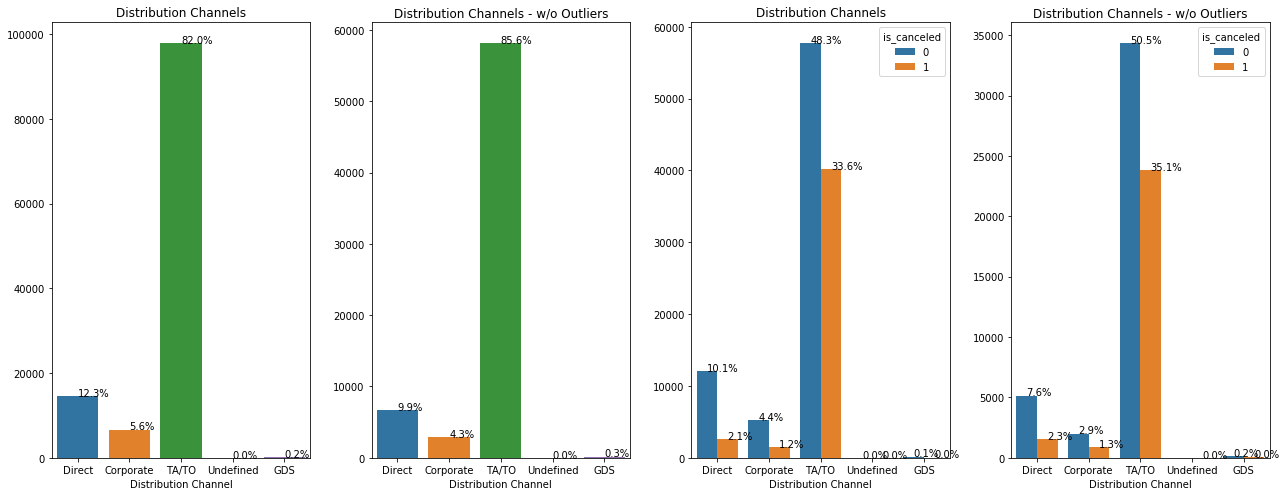

In [12]:
#Distribution Channels

plt.figure(figsize=(18,7))

plt.subplot(1,4,1)
ax = sns.countplot(x='distribution_channel', data=df)
plt.title("Distribution Channels")
plt.xlabel("Distribution Channel")
plt.ylabel("")

total = len(df['distribution_channel'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() /2
        y = p.get_y() + p.get_height() +0.02
        ax.annotate(percentage, (x, y))

plt.subplot(1,4,2)
ax = sns.countplot(x='distribution_channel', data=df_o)
plt.title("Distribution Channels - w/o Outliers")
plt.xlabel("Distribution Channel")
plt.ylabel("")

total = len(df_o['distribution_channel'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() /2
        y = p.get_y() + p.get_height() +0.02
        ax.annotate(percentage, (x, y))
        
plt.subplot(1,4,3)
ax = sns.countplot(x='distribution_channel', hue='is_canceled', data=df)
plt.title("Distribution Channels")
plt.xlabel("Distribution Channel")
plt.ylabel("")

total = len(df['distribution_channel'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() /2
        y = p.get_y() + p.get_height() +0.02
        ax.annotate(percentage, (x, y))

plt.subplot(1,4,4)
ax = sns.countplot(x='distribution_channel', hue='is_canceled', data=df_o)
plt.title("Distribution Channels - w/o Outliers")
plt.xlabel("Distribution Channel")
plt.ylabel("")

total = len(df_o['distribution_channel'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() /2
        y = p.get_y() + p.get_height() +0.02
        ax.annotate(percentage, (x, y))
        
plt.tight_layout()        
plt.show()

INSIGHT - THE LARGE MAJORITY (82%) USE AN AGENT OR OPERATOR TO BOOK THEIR STAY.  ONLY 12% BOOK DIRECTLY.  A HIGHER PROPORTION OF NON-OUTLIERS USE AN AGENT, WITH FEWER BOOKING DIRECT OR CORPORATE.

TA/TO - CANCELLED 41%/41% WITH/NO OUTLIERS
DIRECT - CANCELLED 17%/24% WITH/NO OUTLIERS
CORPORATE - CANCELLED 21%/41% WITH/NO OUTLIERS

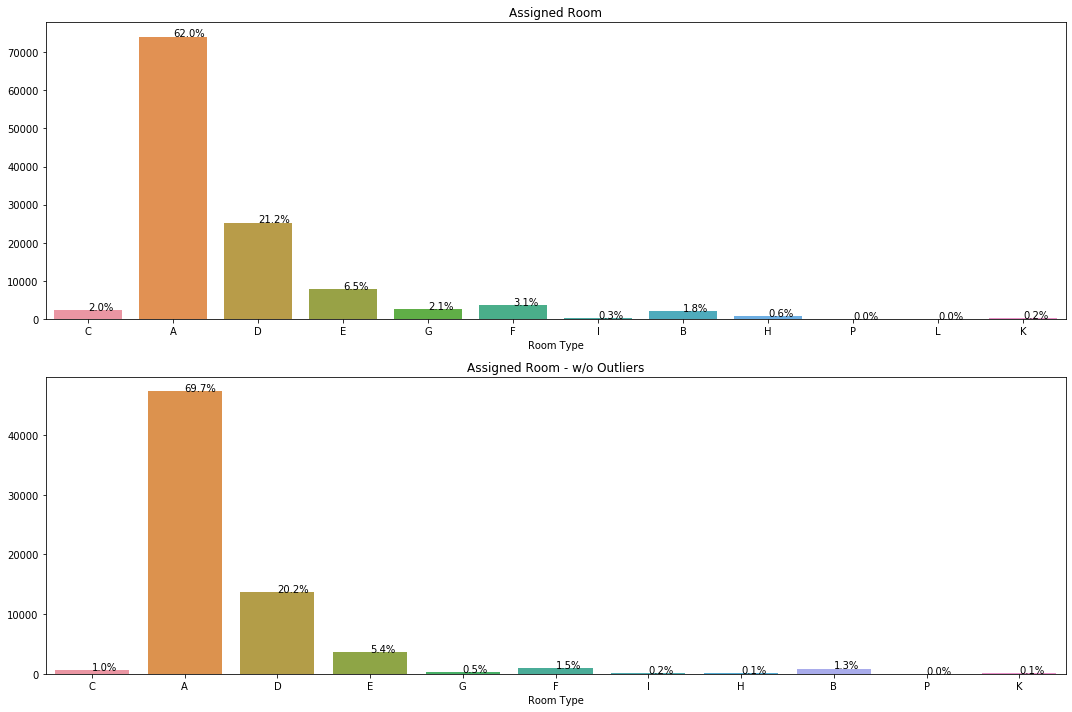

In [13]:
#Assigned Room Type (differs from reserved due to overbooking or customer's request)
#Room A (75000), then Room D (25000).......

plt.figure(figsize=(15,10))

plt.subplot(2,1,1)
ax = sns.countplot(x='assigned_room_type', data=df)
plt.title("Assigned Room")
plt.xlabel("Room Type")
plt.ylabel("")

total = len(df['assigned_room_type'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() /2
        y = p.get_y() + p.get_height() +0.02
        ax.annotate(percentage, (x, y))

plt.subplot(2,1,2)
ax = sns.countplot(x='assigned_room_type', data=df_o)
plt.title("Assigned Room - w/o Outliers")
plt.xlabel("Room Type")
plt.ylabel("")

total = len(df_o['assigned_room_type'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() /2
        y = p.get_y() + p.get_height() +0.02
        ax.annotate(percentage, (x, y))

plt.tight_layout()        
plt.show()

INSIGHT - MOST GUESTS (62%) HAVE ROOM TYPE A, FOLLOWED BY ROOM TYPE D (21.2%), THEN E (6.5%).  ALTHOUGH 9 OTHER ROOM TYPES, THEY MADE UP ALL 10% OF THE TOTAL. NON-OUTLIERS ARE MORE OFTEN ASSIGNED TO TYPE A, BUT SIMILAR PROPORTIONS AMONGST OTHER ROOM TYPES ARE STILL PRESENT.

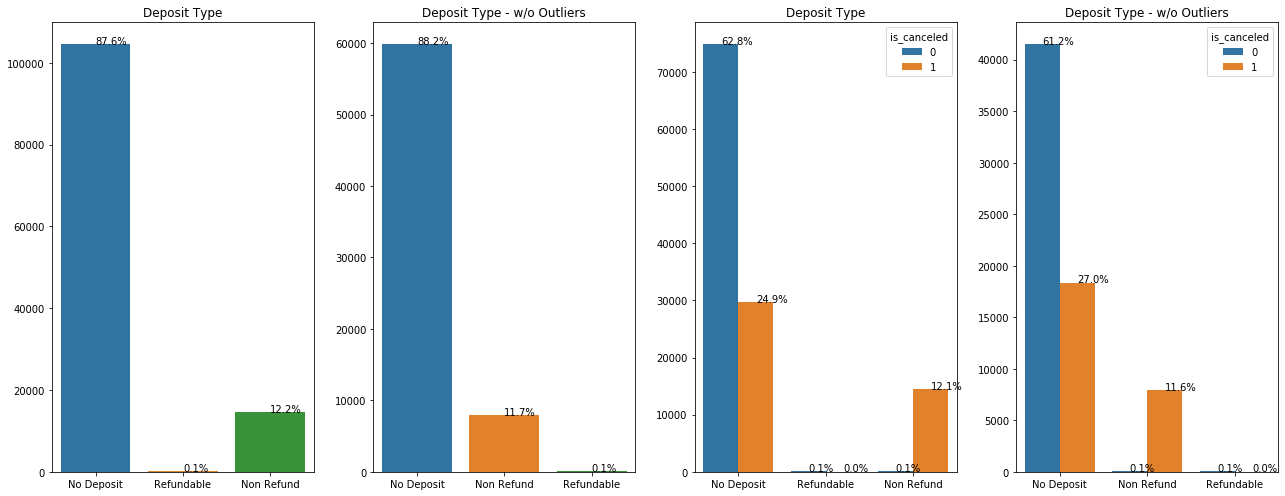

In [14]:
#Deposit type

plt.figure(figsize=(18,7))

plt.subplot(1,4,1)
ax = sns.countplot(x='deposit_type', data=df)
plt.title("Deposit Type")
plt.xlabel("")
plt.ylabel("")

total = len(df['deposit_type'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() /2
        y = p.get_y() + p.get_height() +0.02
        ax.annotate(percentage, (x, y))

plt.subplot(1,4,2)
ax = sns.countplot(x='deposit_type', data=df_o)
plt.title("Deposit Type - w/o Outliers")
plt.xlabel("")
plt.ylabel("")

total = len(df_o['deposit_type'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() /2
        y = p.get_y() + p.get_height() +0.02
        ax.annotate(percentage, (x, y))
 
plt.subplot(1,4,3)
ax = sns.countplot(x='deposit_type', hue='is_canceled', data=df)
plt.title("Deposit Type")
plt.xlabel("")
plt.ylabel("")

total = len(df['deposit_type'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() /2
        y = p.get_y() + p.get_height() +0.02
        ax.annotate(percentage, (x, y))

plt.subplot(1,4,4)
ax = sns.countplot(x='deposit_type', hue='is_canceled', data=df_o)
plt.title("Deposit Type - w/o Outliers")
plt.xlabel("")
plt.ylabel("")

total = len(df_o['deposit_type'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() /2
        y = p.get_y() + p.get_height() +0.02
        ax.annotate(percentage, (x, y))

plt.tight_layout()
plt.show()

INSIGHT - ALMOST 9 IN 10 RESERVATIONS ARE W/O ANY DEPOSIT - COULD THIS BE DRIVING THE HIGH CANCELLATION RATE?

SIMILAR PROPORTION AMONGST NON-OUTLIERS

NO DEPOSIT - CANCELLED 28%/32% W/NO OUTLIERS
NON REFUNDABLE - CANCELLED 99%/99% W/NO OUTLIERS
REFUNDABLE - CANCELLATED ??/?? W/NO OUTLIERS (TOO SMALL HERE TO VISUALLY MEASURE)

Text(0.5, 1.0, 'Boxplots w/o Cancellations')

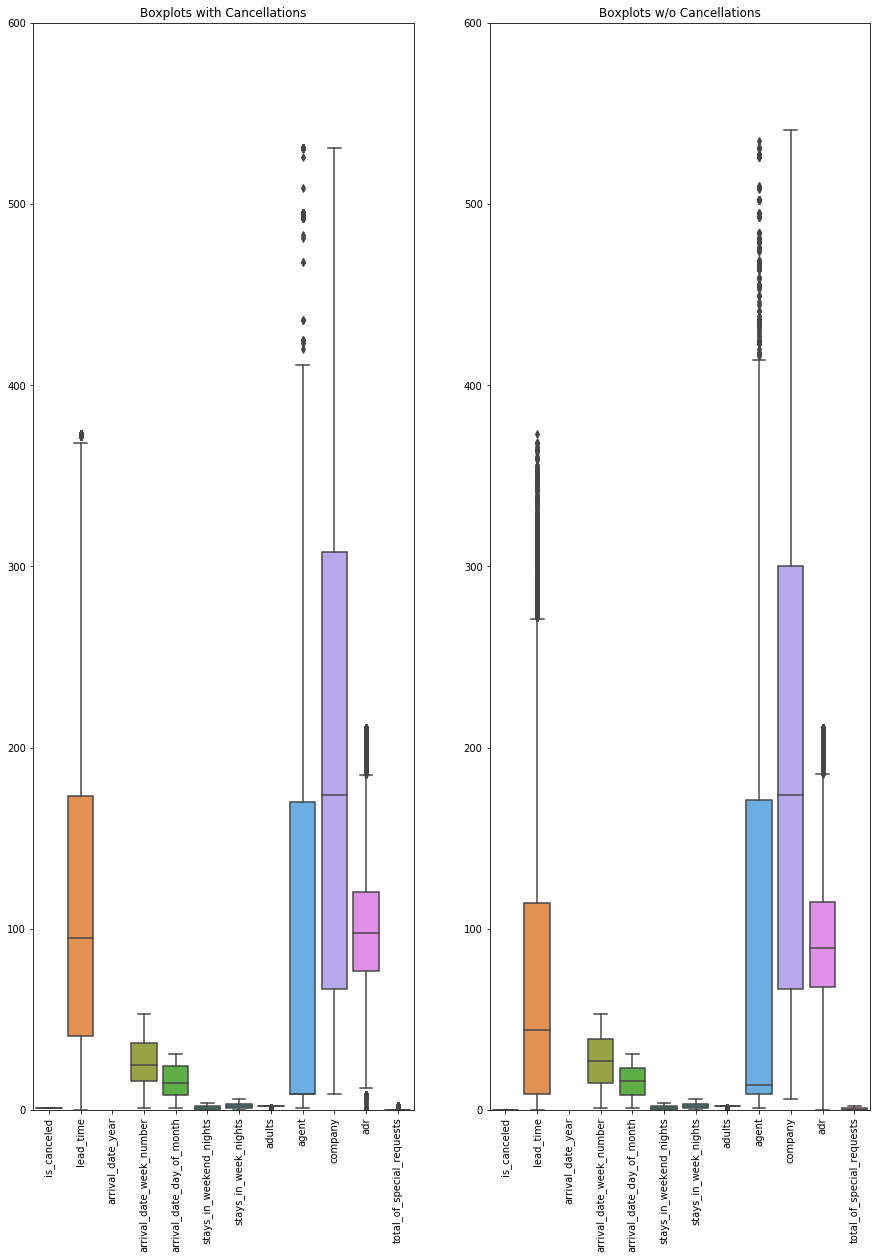

In [15]:
#Boxplots - Cancelled vs. Noncancelled (no outliers)
#revised to ylim filter 600

plt.figure(figsize=(15,20))
canceled = df_o[df_o['is_canceled'] == 1]
noncanceled = df_o[df_o['is_canceled'] == 0]
plt.subplot(1,2,1)
sns.boxplot(data = canceled)
plt.xticks(rotation=90)
plt.ylim(0,600)
plt.title('Boxplots with Cancellations')
plt.subplot(1,2,2)
sns.boxplot(data = noncanceled)
plt.xticks(rotation=90)
plt.ylim(0,600)
plt.title('Boxplots w/o Cancellations')

INSIGHTS - VISUALLY SOME PATTERNS EMERGE.
1.  LEAD TIME - CANCELED HAVE HIGHER MEDIAN AND IQR BUT FEWER UPPER END OUTLIERS; LONG LEAD TIMES MEAN HIGHER INCIDENCE OF CANCELLATIONS.
2.  ARRIVAL DATES - VERY SIMILAR, SO SAME RELATIVE PROPORTION OF CANCELATIONS REGARDLESS OF MONTH/SEASON.  CANCELATIONS LIKELY A RESULT OF VOLUME, NOT SEASON.
3.  COUNTRY - HIGHER MEDIAN OF CANCELED, SLIGHTLY WIDER IQR, ALMOST SAME TOTAL RANGE.  COUNTRY DOES AFFECT CANCELLATIONS
4.  AGENT - LITTLE DIFFERENCE
5.  COMPANY - SMALL IQR AND RANGE OF COMPANIES THAT DON'T CANCEL, WORTH REVIEWING BELOW.
6.  ADR (PRICE/NIGHT) - SLIGHTLY HIGHER PRICE POINT OF CANCELATIONS (ABOUT $110 MEDIAN FOR CANCELLED VS $90 NON-CANCELLED).

Text(0.5, 1.0, 'Boxplots w/o Cancellations')

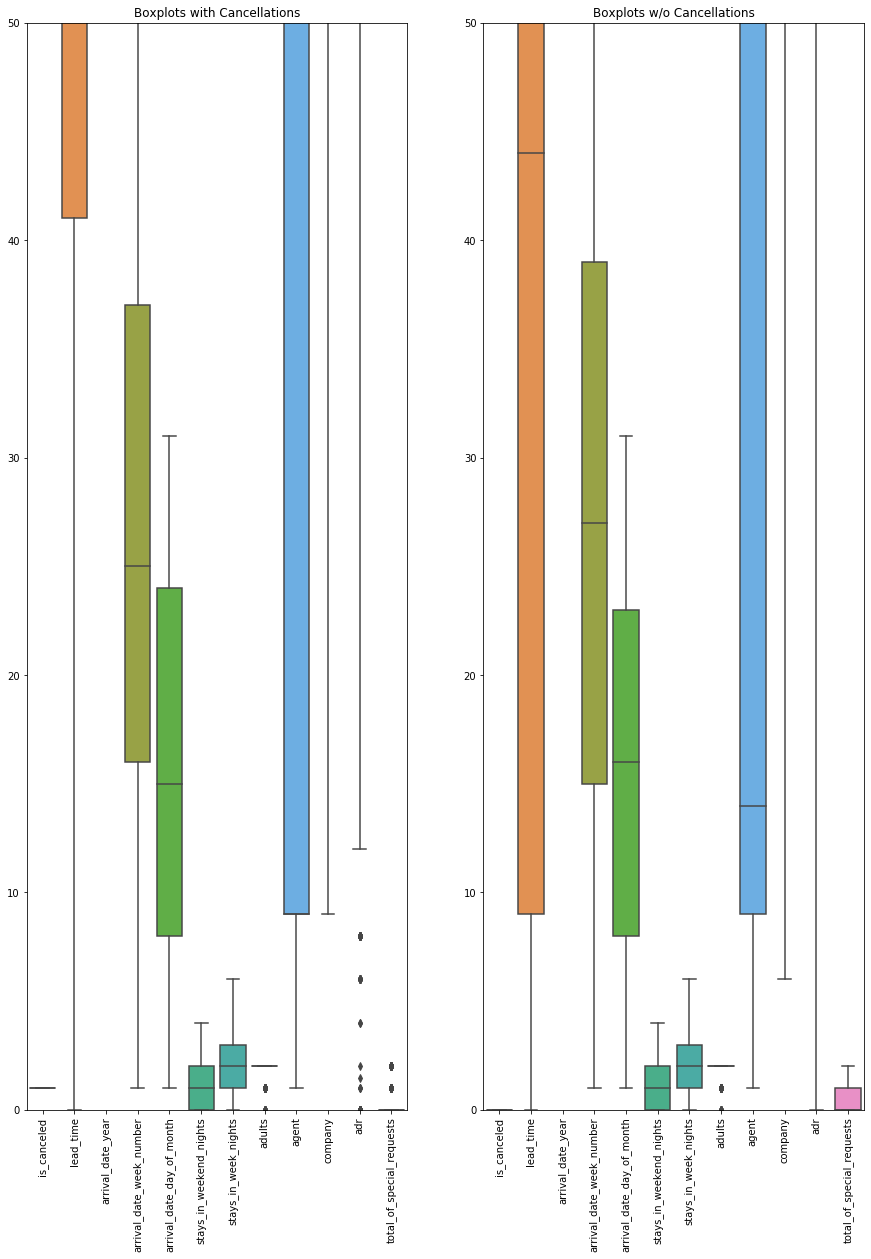

In [16]:
#Boxplots - Cancelled vs. Noncancelled (no outliers), scaled down to view smaller attributes

plt.figure(figsize=(15,20))
canceled = df_o[df_o['is_canceled'] == 1]
noncanceled = df_o[df_o['is_canceled'] == 0]
plt.subplot(1,2,1)
sns.boxplot(data = canceled)
plt.xticks(rotation=90)
plt.ylim(0,50)
plt.title('Boxplots with Cancellations')
plt.subplot(1,2,2)
sns.boxplot(data = noncanceled)
plt.xticks(rotation=90)
plt.ylim(0,50)
plt.title('Boxplots w/o Cancellations')

INSIGHTS - 
1.  NO DIFFERENCE BTW CITY VS RESORT HOTEL CANCELLATION RATES
2.  NO DIFFERENCE ON WEEKENDS, BUT WEEKDAY NIGHTS CANCEL MORE OFTEN (MEDIAN 3 CANCELED, VS MEDIAN 2 DIDN'T CANCEL)
3.  NO DIFFERENCE BTW ROOM TYPES
4.  NO DIFFERENCE BTW SPECIAL REQUESTS
5.  MARKET SEGMENT ABOUT SAME, OR NOT ENOUGH CANCELED DATA POINTS TO FORM AN IQR?

Text(0.5, 1, 'Correlation of Variables')

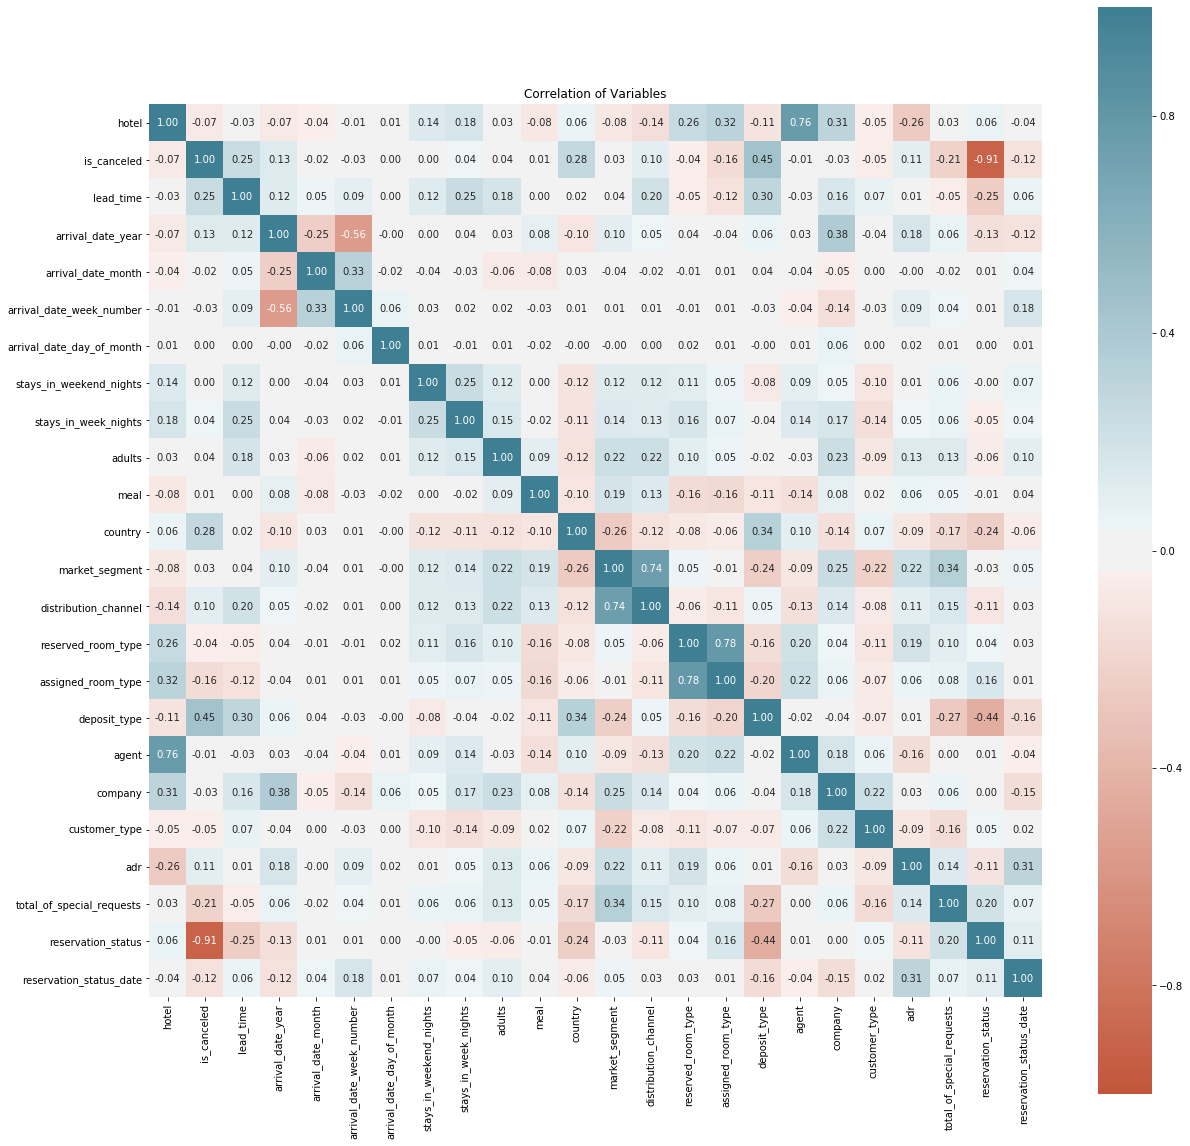

In [17]:
#Heatmap of All Variable w/o Outliers


df_o['hotel']=df_o['hotel'].astype('category').cat.codes
df_o['arrival_date_month']=df_o['arrival_date_month'].astype('category').cat.codes
df_o['meal']=df_o['meal'].astype('category').cat.codes
df_o['country']=df_o['country'].astype('category').cat.codes
df_o['market_segment']=df_o['market_segment'].astype('category').cat.codes
df_o['distribution_channel']=df_o['distribution_channel'].astype('category').cat.codes
df_o['reserved_room_type']=df_o['reserved_room_type'].astype('category').cat.codes
df_o['assigned_room_type']=df_o['assigned_room_type'].astype('category').cat.codes
df_o['deposit_type']=df_o['deposit_type'].astype('category').cat.codes
df_o['customer_type']=df_o['customer_type'].astype('category').cat.codes
df_o['reservation_status']=df_o['reservation_status'].astype('category').cat.codes
df_o['reservation_status_date']=df_o['reservation_status_date'].astype('category').cat.codes



fig, ax = plt.subplots(figsize=(20,20)) 
ax = sns.heatmap(
    df_o.corr(), 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=256),
    square=True, annot=True, fmt=".2f")
corr=df_o.corr()
corr.sort_values("is_canceled", ascending=False)
bottom, top = ax.get_ylim()


ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Correlation of Variables")



INSIGHTS - A HANDFUL OF VARIABLES STAND OUT IN DARK BLUE AND ORANGE WITH RELATIVELY HIGH CORRELATION TO CANCELATION (SECOND COLUMN).  BARPLOT BELOW TO SORT THESE FOR FURTHER ANALYSIS

WHY THE BLANK VARIABLES ONCE I REMOVED OUTLIERS?  (using df_o instead of df)

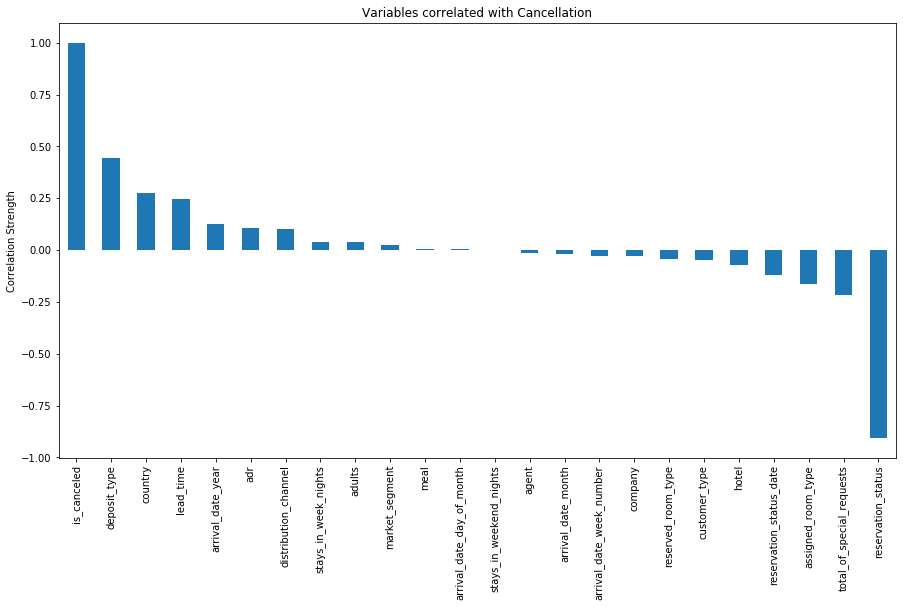

In [18]:
#Barplot of Correlated Features

plt.figure(figsize=(15,8))
corr = df_o.corr()
corr = corr.sort_values('is_canceled', ascending=False)
corr['is_canceled'].plot(kind='bar')
df_o.corr().drop(['is_canceled','reservation_status'], axis=1)


total = len(df_o['is_canceled'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() /2
        y = p.get_y() + p.get_height() +0.02
        ax.annotate(percentage, (x, y))

plt.title("Variables correlated with Cancellation")
plt.ylabel("Correlation Strength")
plt.show()

INSIGHTS - LEAD TIME, DEPOSIT, AND COUNTRY HAVE HIGHEST POSITIVE CORRELATION.  BOOKING CHANGES, CAR SPACES, SPECIAL REQUESTS AND RESERVATION STATUS HAVE HIGHEST NEGATIVE CORRELATION.

SAME QUESTION - WHY THE BLANK VARIABLES ONCE I REMOVED OUTLIERS?  (using df_o instead of df)

In [19]:
#OLS Regression 

#filtered out "reservation status" as self-referencing/circular and skews correlation.....remove those with smallest individual R2's and/or coefficients to re-compare?
#R2 of 0.26

dependentVar = df_o['is_canceled']

filt = ['hotel',
'lead_time',
'arrival_date_year',
'arrival_date_month',
'arrival_date_week_number',
'arrival_date_day_of_month',
'stays_in_weekend_nights',
'stays_in_week_nights',
'adults',
'meal',
'country',
'market_segment',
'distribution_channel',        
'reserved_room_type',
'assigned_room_type',        
'deposit_type',        
'agent',
'company',
'customer_type',
'adr',
'total_of_special_requests',
'reservation_status',        
'reservation_status_date']

from statsmodels.formula.api import ols

model_fit=ols(formula="dependentVar ~ df_o[filt]", data=df_o)
model_fit=model_fit.fit()
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:           dependentVar   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.540e+25
Date:                Wed, 19 Aug 2020   Prob (F-statistic):          5.54e-265
Time:                        16:45:10   Log-Likelihood:                 1353.6
No. Observations:                  45   AIC:                            -2659.
Df Residuals:                      21   BIC:                            -2616.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.0000   4.86e-11   2.06e

In [20]:
#OLS regression - R2's above +/- 0.1 only - R2 of 0.29

dependentVar = df_o['is_canceled']

filt = ['hotel',
'lead_time',
'country',
'distribution_channel',              
'deposit_type',  
'total_of_special_requests',
'adr']


from statsmodels.formula.api import ols

model_fit=ols(formula="dependentVar ~ df_o[filt]", data=df_o)
model_fit=model_fit.fit()
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:           dependentVar   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     3520.
Date:                Wed, 19 Aug 2020   Prob (F-statistic):               0.00
Time:                        16:45:28   Log-Likelihood:                -37015.
No. Observations:               67930   AIC:                         7.405e+04
Df Residuals:                   67922   BIC:                         7.412e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.1569      0.008    -18.859

INSIGHT - Cancellation rates from count plots above (w/o outliers):

HOTEL TYPE
RESORT - 35%
CITY - 42% 

COUNTRY OF ORIGIN
PORTUGAL - 63%
BRITISH - 24%
FRENCH - 20%
SPANISH - 31% 
DUTCH - 19% 

DISTRIBUTION CHANNEL
TA/TO - 41% 
DIRECT - 24%
CORPORATE - 41%

DEPOSIT TYPE
NO DEPOSIT - 32% 
NON REFUNDABLE - 99%

So does this mean that a Portuguese guest to the city hotel who didn't book direct (either agent or corporate) is most likely to cancel?  And that virutally everyone who puts down a nonrefundable deposit winds up cancelling?

What additional analysis/code needed to make statement about odds/probability that any given customer segment or attribute will cancel?